# Imports

In [1]:
import math
import inflection
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import Image
import datetime as dt
pd.set_option('display.max_columns', 500)

## Loading Data

In [2]:
                            # lê todo o arquivo de uma vez 
df_sales_raw = pd.read_csv("data/train.csv", low_memory=False)
df_store_raw = pd.read_csv("data/store.csv", low_memory=False)

# merge
df_raw = pd.merge(  df_sales_raw, df_store_raw, how='left', on='Store' )

In [3]:
df_raw.sample(20)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
861807,698,1,2013-05-20,0,0,0,0,a,0,a,a,1790.0,5.0,2011.0,0,NaN,NaN,NaN
319841,302,5,2014-10-03,0,0,0,1,a,0,d,c,2190.0,12.0,2007.0,1,9.0,2011.0,"Mar,Jun,Sept,Dec"
394714,381,2,2014-07-15,11323,1109,1,1,0,0,a,a,1800.0,11.0,2006.0,1,5.0,2013.0,"Feb,May,Aug,Nov"
352422,122,5,2014-08-29,8753,1094,1,0,0,0,a,c,58260.0,4.0,2013.0,0,NaN,NaN,NaN
959368,139,4,2013-02-21,6584,544,1,1,0,0,a,a,1700.0,1.0,2008.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
672497,938,3,2013-11-06,10110,983,1,1,0,0,a,a,2820.0,9.0,2009.0,0,NaN,NaN,NaN
66550,766,2,2015-06-02,8008,604,1,1,0,1,d,c,9820.0,NaN,NaN,0,NaN,NaN,NaN
541666,562,1,2014-03-03,23540,3442,1,1,0,0,b,c,1210.0,NaN,NaN,0,NaN,NaN,NaN
468424,910,4,2014-05-08,5596,609,1,1,0,0,d,c,12480.0,NaN,NaN,1,1.0,2013.0,"Jan,Apr,Jul,Oct"
697893,689,1,2013-10-14,5696,608,1,0,0,1,d,a,15040.0,10.0,2004.0,0,NaN,NaN,NaN


# PASSO 1 - Data Description

In [4]:
# Meigarom faz uma cópia a cada seção nova, pra em grandes códigos evitar sobrescrever a var
# do DS original e ter que rodar tudo de novo.
df1 = df_raw.copy()

## Rename Columns

In [5]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [6]:
#pega as colunas originais
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']

In [7]:
#cria função pra transformar em snake_case
snakecase = lambda x: inflection.underscore ( x )

#aplica a função em todas as palabras de cols_old, guarda em lista na cols_new
cols_new = list( map( snakecase, cols_old ) )

#rename
df1.columns = cols_new

In [8]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## Data Dimension

In [9]:
print (f'Number of rows: {df1.shape[0] }')
print (f'Number of rows: {df1.shape[1] }')

Number of rows: 1017209
Number of rows: 18


## Data Types

In [10]:
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [11]:
#convert 'date' to datetime:
df1['date'] = pd.to_datetime( df1['date'] )
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## Check NA

In [12]:
# Ver todas linhas que tem ao menos 1 NA
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

### Há 3 formas de tratar:
1 - Excluir todas as linhas com NA.
     - Bom: rápido e fácil
     - Péssimo: descarta dados, pode prejudicar meu modelo
    
2 - Usar algoritmos de ML pra substituir NAs pela média, mediana, prevendo o número que seria 
através das colunas que tem valor.

3 - Descobrir porque o NA tá aqui. Pode ter trocado o sistema, antes não tinha essa coluna. Ou ainda antes era o valor de outra coluna.

## Fillout NA

Colunas com NA:
-competition_distance
-competition_open_since_month
-competition_open_since_year
-promo2_since_week
-promo2_since_year
-promo_interval

In [13]:
#competition_distance
#CompetitionDistance - distance in meters to the nearest competitor store

# Vou assumir que os que não tem valor aqui, não tem competidores perto.
# Logo, vou atribuir pras NAs um valor bem amior que o maior valor de distância existente.
df1['competition_distance'].max()

75860.0

In [14]:
#atribuindo o valor pra todas NA

df1['competition_distance'] = df1['competition_distance'].apply( lambda x: 200000.0 if math.isnan( x ) else x ) 

In [15]:
#competition_open_since_month
# CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the
# nearest competitor was opened

# Se esta coluna está vazia, ou deve ser porque não tem competidor próximo, ou porque
# não sabem quando foi aberta. 
# Vou assumir nesse primeiro ciclo então minha data de venda como a data de abertura do 
# competidor, mesmo que seja simplista.

# precisa axis aqui pois são duas colunas que estamos mexendo no lambda
df1['competition_open_since_month'] = df1.apply ( lambda x: x['date'].month 
                    if math.isnan( x['competition_open_since_month'] ) 
                    else x['competition_open_since_month'], axis=1 ) 

In [16]:
#competition_open_since_year
# CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the
# nearest competitor was opened

# Vamos fazer pro year o mesno que o feito pro month:
df1['competition_open_since_year'] = df1.apply ( lambda x: x['date'].year 
                    if math.isnan( x['competition_open_since_year'] ) 
                    else x['competition_open_since_year'], axis=1 ) 

In [17]:
#promo2_since_week

# Promo2Since[Year/Week] - describes the year and calendar week when the store started 
#    participating in Promo2
#Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not
#    participating, 1 = store is participating

# promo2_since_week: Também vamos por hora setar a partir da data de venda
df1['promo2_since_week'] = df1.apply ( lambda x: x['date'].week 
                    if math.isnan( x['promo2_since_week'] ) 
                    else x['promo2_since_week'], axis=1 )

In [18]:
#promo2_since_year: Também vamos por hora setar a partir da data de venda
df1['promo2_since_year'] = df1.apply ( lambda x: x['date'].year 
                    if math.isnan( x['promo2_since_year'] ) 
                    else x['promo2_since_year'], axis=1 )

In [19]:
#promo_interval
# PromoInterval - describes the consecutive intervals Promo2 is started, naming the months 
# the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in 
# February, May, August, November of any given year for that store

#
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 
 9: 'Sept', 10: 'Out', 11: 'Nov', 12: 'Dec' }

#preencher NA com zeros
#inplace=True pra não retornar valor, mas modificar na coluna
df1['promo_interval'].fillna(0, inplace=True)

#cria coluna 'month_map' e seta o mes nela
df1['month_map'] = df1['date'].dt.month.map( month_map )

#cria coluna 'is_promo', e seta 1 se 'month_map' estiver em 'promo_interval', senão 0.
#assim, consigo saber se naquela venda, estava ou não em promoção.
df1['is_promo'] = df1[['promo_interval', 'month_map']].apply ( lambda x: 
      0 if x['promo_interval'] == 0 else 
      1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis =1 )

In [20]:
 df1.sample(5)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo
754609,540,6,2013-08-24,3930,304,1,0,0,0,d,c,810.0,8.0,2013.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct",Aug,0
356716,789,1,2014-08-25,3406,444,1,0,0,1,a,c,9770.0,7.0,2003.0,0,35.0,2014.0,0,Aug,0
266185,981,7,2014-11-30,0,0,0,0,0,0,d,c,2620.0,11.0,2002.0,0,48.0,2014.0,0,Nov,0
564033,629,2,2014-02-11,6056,603,1,0,0,0,d,a,510.0,7.0,2014.0,1,23.0,2015.0,"Mar,Jun,Sept,Dec",Feb,0
633946,297,2,2013-12-10,6562,682,1,0,0,0,a,a,2300.0,9.0,2010.0,0,50.0,2013.0,0,Dec,0


In [21]:
 df1.sample(5).T

,89097,383892,408611,652390,503026
store,1013,861,192,901,947
day_of_week,3,7,1,7,1
date,2015-05-13 00:00:00,2014-07-27 00:00:00,2014-06-30 00:00:00,2013-11-24 00:00:00,2014-04-07 00:00:00
sales,3765,0,12359,0,6622
customers,425,0,828,0,1034
open,1,0,1,0,1
promo,0,0,1,0,0
state_holiday,0,0,0,0,0
school_holiday,0,0,0,0,0
store_type,a,c,d,a,a


In [22]:
#resolvido
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## Change Types

In [23]:
# Como fizemos alteração nas colunas, é importante conferir se não mudou o formato das colnas
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [24]:
#converter de float pra int
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype( int )
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype( int )
df1['promo2_since_week'] = df1['promo2_since_week'].astype( int )
df1['promo2_since_year'] = df1['promo2_since_year'].astype( int )

In [25]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [26]:
df1.sample(5)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo
372981,109,4,2014-08-07,6107,689,1,1,0,1,a,c,3300.0,11,2010,0,32,2014,0,Aug,0
623586,1087,5,2013-12-20,9198,802,1,1,0,0,d,c,2210.0,11,2011,0,51,2013,0,Dec,0
428838,349,4,2014-06-12,8463,846,1,0,0,0,c,c,1490.0,4,2009,0,24,2014,0,Jun,0
996039,15,6,2013-01-19,5020,576,1,0,0,0,d,c,4110.0,3,2010,1,14,2011,"Jan,Apr,Jul,Oct",Jan,1
873341,1082,5,2013-05-10,10288,1495,1,0,0,1,c,a,440.0,4,2002,0,19,2013,0,May,0


## Descriptive Statistical

Serve para 2 coisas:
 - 1  Termos alguma noção de negócios pelos dados
 - 2  Conseguirmos detectar alguns erros (venda negativa por ex..)

Métricas de tendência central: média e mediana (resumem dados em um único número)
Metricas de dispersão: desvio padrão, min, max, range, skew, kurtosis

In [27]:
#separa colunas numéricas e categóricas, pra aplicar a estatística em cada conjunto:
num_attributes = df1.select_dtypes ( include=['int64','float64'] )
cat_attributes = df1.select_dtypes ( exclude=['int64','float64','datetime64[ns]'] )

In [28]:
num_attributes.sample(5)

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo
977682,613,2,8507,1141,1,1,0,250.0,6,2007,1,14,2011,0
366736,465,4,6174,518,1,0,1,10890.0,4,2005,0,33,2014,0
941711,322,6,1647,207,1,0,0,17500.0,4,2001,1,37,2009,0
588919,985,1,10313,914,1,1,0,490.0,5,2007,1,13,2010,1
135487,573,3,5009,352,1,1,1,1190.0,11,2012,1,36,2013,1


In [29]:
cat_attributes.sample(5)

,state_holiday,store_type,assortment,promo_interval,month_map
1004254,0,d,c,0,Jan
129619,b,d,c,"Mar,Jun,Sept,Dec",Apr
496791,0,c,a,"Jan,Apr,Jul,Oct",Apr
616482,c,d,c,"Feb,May,Aug,Nov",Dec
634432,0,d,c,0,Dec


### Numerical Attibures

In [30]:
#Métricas de tendência central: média e mediana
ct1 = pd.DataFrame ( num_attributes.apply ( np.mean ) ).T
ct2 = pd.DataFrame ( num_attributes.apply ( np.median ) ).T

#Metricas de dispersão: desvio padrão, min, max, range, skew, kurtosis
d1 = pd.DataFrame ( num_attributes.apply ( np.std ) ).T
d2 = pd.DataFrame ( num_attributes.apply ( min ) ).T
d3 = pd.DataFrame ( num_attributes.apply ( max ) ).T
d4 = pd.DataFrame ( num_attributes.apply ( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame ( num_attributes.apply ( lambda x: x.skew() ) ).T
d6 = pd.DataFrame ( num_attributes.apply ( lambda x: x.kurtosis() ) ).T

#concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6 ] ).T.reset_index() 
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis' ]

In [31]:
#Análise geral:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


In [32]:
#Anlálise de SALES

#Vou retirar as vendas = 0 pra analisar o gráfico mais limpo:
df_sales_pos = df1.loc[ df1['sales'] > 0 ]

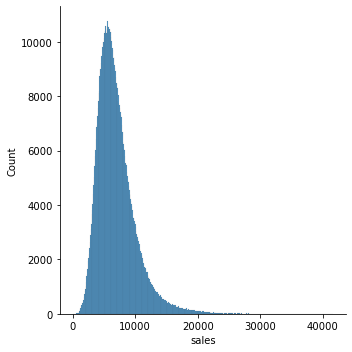

In [33]:
p = sns.displot ( df_sales_pos['sales'] )
#p.fig.set_dpi(100)
plt.show()

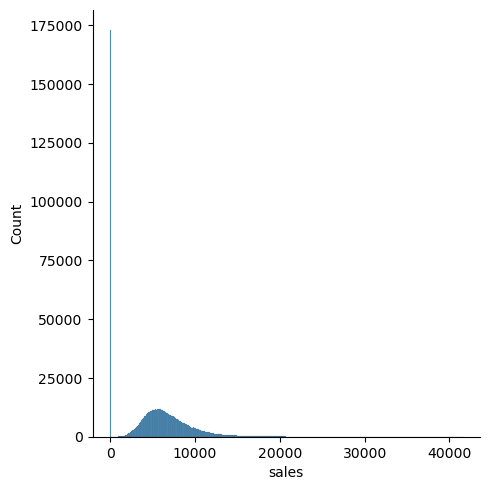

In [34]:
#Abaixo, ploto o gráfico do Sales original, porque o m que estou analistando 
# considera os zeros nas vendas também!
p = sns.displot ( df1['sales'] )
p.fig.set_dpi(100)
plt.show()

ANÁLISE SALES:

- Média e mediana bem próximas, não vai ter deslocamento da distribuição muito grande, vide skew.
- Skew 0.6 positivo (deslocamento leve para esquerda), mas bem próximo a zero, logo distribuição bem próxima de uma normal. 
- Kurtosis 1.77 positiva, próxima de 2, tem um pico grande.
- A média é de 5773 vendas/dia, e o std de 3850: Isto significa que em 78% dos dias (±1 std), temos entre 1923 (5773-3850) e 9.623 (5773+3850) vendas.

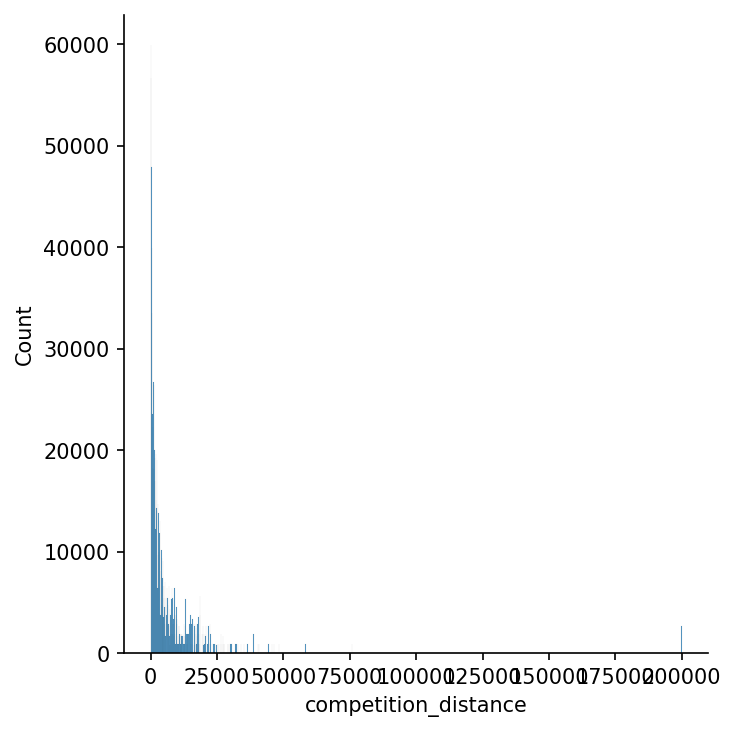

In [35]:
#Análise competition distance
p = sns.displot ( df1['competition_distance'] )
p.fig.set_dpi(150)
plt.show()

ANÁLISE COMPETITION DISTANDE:(apenas > 0):

- Média e mediana bem longe uma da outra, logo vai ter deslocamento da normal muito grande, 
vide skew.
- Skew 10.2 positiva (deslocamento enorme pra esquerda), indicando grande concentração de 
distâncias menores até os concorrentes.
- Kurtosis 147 positiva, indicando um pico gigantesco.

In [36]:
#Análise customers
#Vou retirar customers = 0 pra analisar o gráfico mais limpo:

df_cust_pos = df1.loc[ df1['customers'] > 0 ]

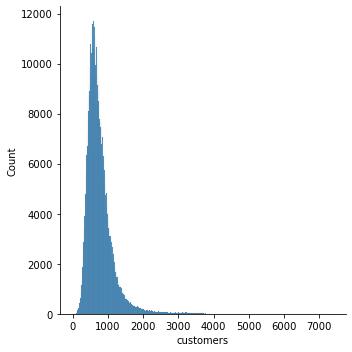

In [37]:
p = sns.displot ( df_cust_pos['customers'] )
#p.fig.set_dpi(150)
plt.show()

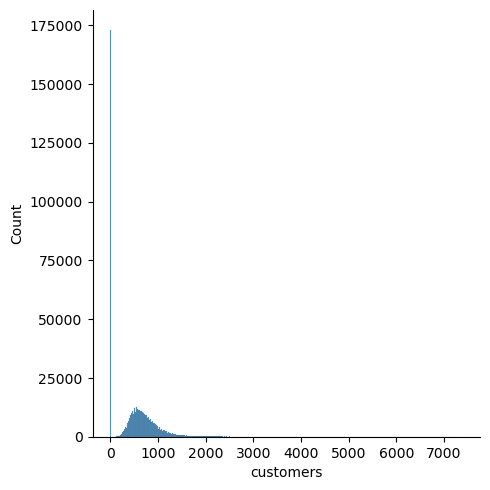

In [38]:
#Abaixo, ploto o gráfico do Customer original, porque o m que estou analistando 
# considera os zeros nos customers também!
p = sns.displot ( df1['customers'] )
p.fig.set_dpi(100)
plt.show()

ANÁLISE CUSTOMERS:

- Média (633) e mediana (609) próximas, mas mediana menor: deslocamento da curva levemente pra esquerda.

- Logo, skew levemente positiva, indicando maior concentração dos valores mais abaixo da média (ponto central).

- Kursosis de 7, logo pico muito alto /distribuição bem dispersa em número de clientes por dia.

- Std de 464, e média de clientes por dia de 633: em 78% dos dias (34% ref. 1 std positivo + 34% ref. 1 std negativo), tivemos entre 169 (633-464) e 1097 (633+464) clientes. 



In [39]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


### Categorical Attibures

In [40]:
cat_attributes.apply ( lambda x: x.unique().shape[0] )

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

In [41]:
df1['state_holiday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: state_holiday, dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

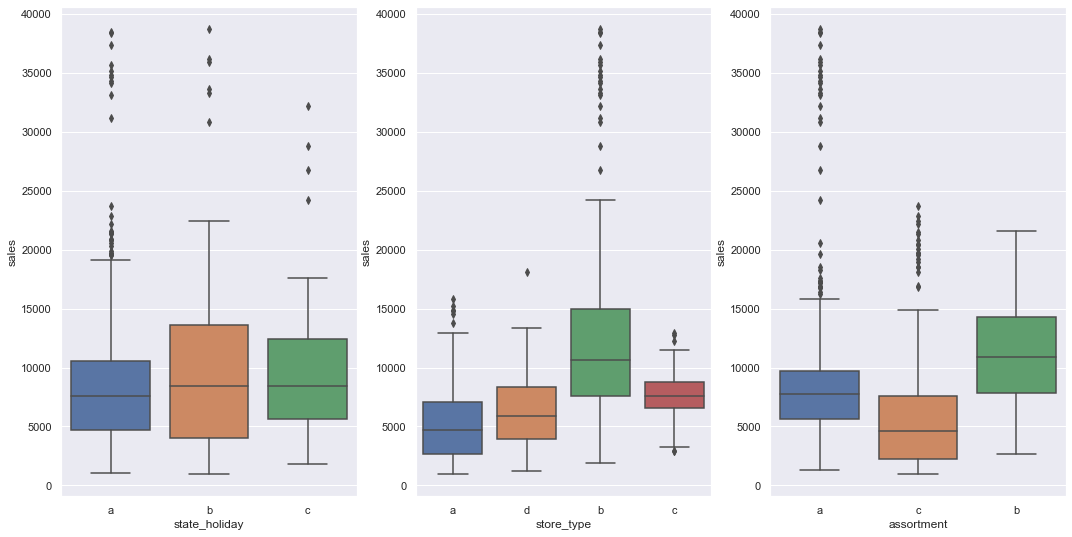

In [42]:
#Boxplot tem todas as medidas de dispersão e tendência central. Vamos usar ele.

#vendas nos feriados: remover dias não feriado e dias onde não teve vendas 
aux1 = df1[ (df1['state_holiday'] != '0') & (df1['sales'] > 0) ]

#setar tamanho:
sns.set(rc={'figure.figsize':(18,9)})

plt.subplot (1, 3, 1)
sns.boxplot( x='state_holiday', y='sales', data=aux1 )

plt.subplot (1, 3, 2)
sns.boxplot( x='store_type', y='sales', data=aux1 )

plt.subplot (1, 3, 3)
sns.boxplot( x='assortment', y='sales', data=aux1 )

Acima, a linha meio de cada imagem colorida é o 50º quartil, ou seja a mediana.
A borda da figura de baixo é o quartil 25, a de cima o 75.
Logo, dentro da imagem laranja, tenho o volume do quartil 25 ao 50, e do 50 ao 75. 
Fora da figura até os riscos superior e inferior é o valor mínimo e máximo.
Pontos após os riscos das bordas (valores máximos) são outliers: > 3 vezes o desvio padrão.

Logo, quanto mais achatada é a figura, maior a concentração em torno da mediana.

Análise do boxplot 1 - quantidade de vendas por tipo de feriado:
Legenda state_holiday: a = public holiday | b = Easter holiday |  c = Christmas

-A mediana de vendas de páscoa(b) e natal (c) é mais alta que de feriados publicos (a).
-A mediana de vendas de páscoa(b) e natal (c) é parecida, mas a dispersão é maior na páscoa.

Análise do boxplot 2 - quantidade de vendas por tipo de loja:
    Legenda de StoreType - differentiates between 4 different store models: a, b, c, d
        
-Loja tipo b vende muito mais na mediana que as demais, aprox. o dobro da tipo a.
-Loja do tipo c tem concentração de vendas maior em torno da mediana.


Análise do boxplot 3 - quantidade de vendas por mix de produtos:
    Legenda de Assortment - describes an assortment level: a = basic, b = extra, c = extended
        
-Há muito mais vendas do mix b do que dos demais. E o número de vendas varia mais também
neste mix.
-O mix A tem uma grande quantidade de outliers, mas uma distribuição bem uniforme fora isto.

In [43]:
#Save CSV:
df1.to_csv('notebooks/data_description_done.csv', index=False) #index=False if I have first columns as index, to avoid saving with the unnamed:0. Don't save the index, and won't have column unnamed:0 created nor problem to load it.
#no import needed, no message will appear.

# PASSO 2 - Feature Engeneering

In [44]:
df2 = df1.copy()

In [45]:
df2.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9,2008,0,31,2015,0,Jul,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",Jul,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",Jul,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9,2009,0,31,2015,0,Jul,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4,2015,0,31,2015,0,Jul,0


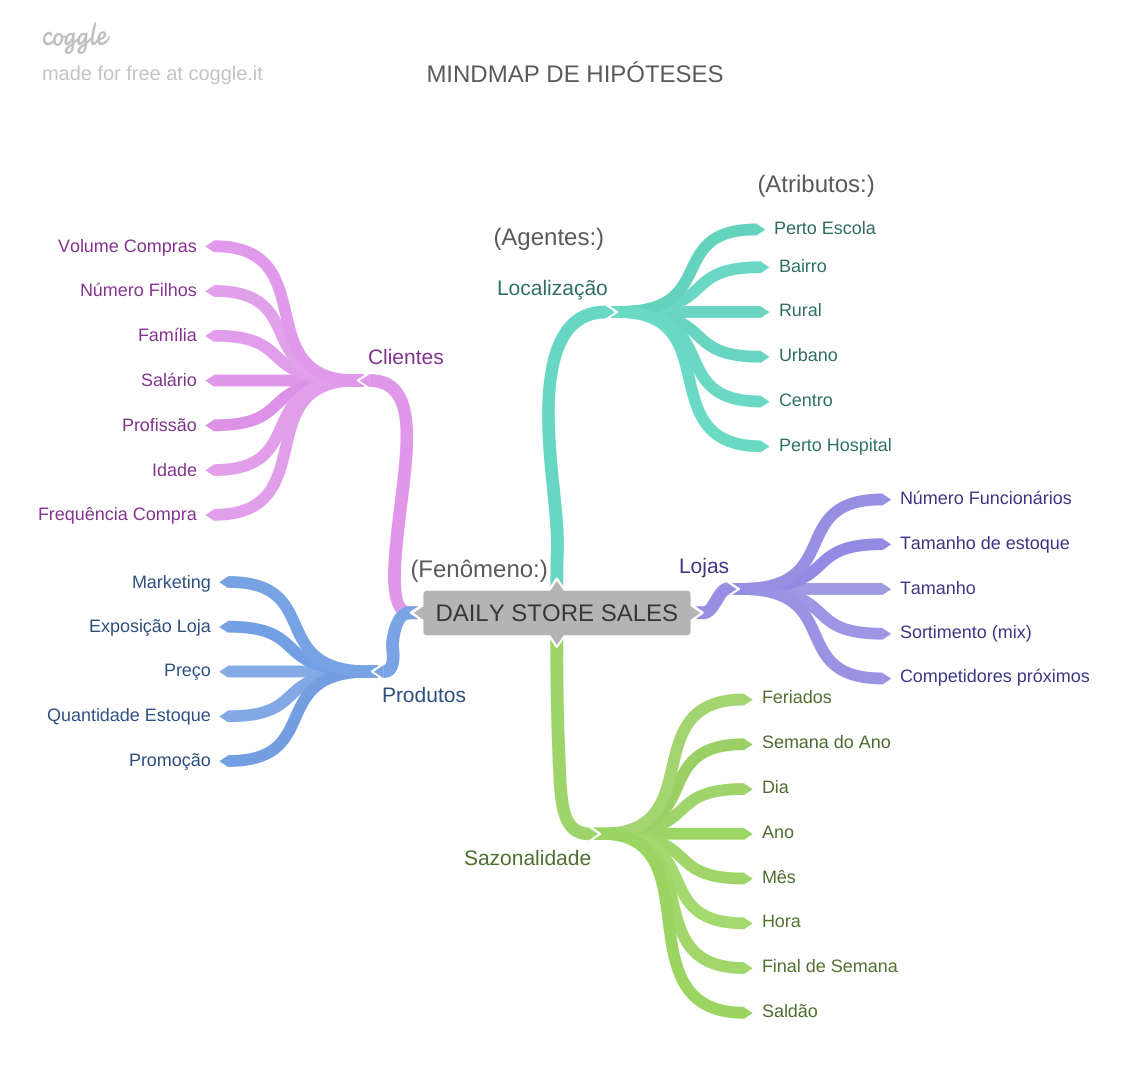

In [46]:
Image ('img/MindMapHypothesis.png')

## Criação das Hipóteses

Hipóteses são Apostas.

Exemplos nesse contexto são:
- Lojas de MAIOR porte (atributo) deveriam vender (fenômeno) MAIS.
- Lojas com MAIOR sortimento (atributo) deveriam vender (fenômeno) MAIS.
- Lojas com MAIS competidores por perto (atributo) deveriam vender (fenômeno) MENOS.

Vamos agora criar hipóteses olhando para o mapa, relacionando o fenômeno e cada agente 
 e seus atributos:
        Na prática, isto é capturado em reunião de brainstorm com o time de negócio.
        Deixar claro que são apostas, e não são relações de causa e efeito, mas correlações:
            Isto porque estamos mapeando todos os atributos correlacionados com vendas, 
            e não há um único.

### Hipóteses Loja

#### Lojas com maior quadro de funcionários deveriam vender mais.

#### Lojas com maior estoque deveriam vender mais.

#### Lojas com maior porte deveriam vender mais.

#### Lojas com maior sortimento deveriam vender mais.

#### Lojas com competidores mais próximos deveriam vender menos.


#### Lojas com competidores à mais tempo deveriam vender mais.

### Hipóteses Produto

#### Lojas que investem mais em marketing deveriam vender mais.

#### Lojas com maior exposição de produto nas vitrines deveriam vender mais.

#### Lojas com produtos de preço menor deveriam vender mais.

#### Lojas com promoções mais agressivas (descontos maiores), deveriam vender mais.

#### Lojas com promoções ativas por mais tempo deveriam vender mais.

#### Lojas com mais dias de promoção deveriam vender mais.

#### Lojas com mais promoções consecutivas deveriam vender mais.

### Hipóteses Sazonalidade

#### Lojas abertas duantes o feriado de natal deveriam vender mais.

#### Lojas deveriam vender mais ao longo dos anos.

#### Lojas deveriam vender no segundo semestre do ano.

#### Lojas deveriam vender mais no dia 10 de cada mês.

#### Lojas deveriam vender menos aos finais de semana.

#### Lojas deveriam vender menos durante os feriados escolares.

## Lista Final de Hipóteses (priorização)

Critério: tenho ou não o dado disponível agora?
    Se tenho, vou priorizar neste primeiro ciclo (listadas abaixo).
    Se não tenho, num ciclo futuro se necessário avalio coletar, conforme a performance do modelo.
    
   Cada hipótese vai gerar tabela, gráfico pra poder avaliar correlação com o fenômeno, como a força dessa correlação.

#### (H1 - loja) Lojas com maior sortimento deveriam vender mais.

#### (H2 - loja) Lojas com competidores mais próximos deveriam vender menos.


#### (H3 - loja) Lojas com competidores à mais tempo deveriam vender mais.

#### (H4 - prod) Lojas com promoções ativas por mais tempo deveriam vender mais.

#### (H5 - prod) Lojas com mais dias de promoção deveriam vender mais.

#### (H6 - prod) Lojas com mais promoções consecutivas deveriam vender mais.

#### (H7 - sazo) Lojas abertas duantes o feriado de natal deveriam vender mais.

#### (H8 - sazo) Lojas deveriam vender mais ao longo dos anos.

#### (H9 - sazo) Lojas deveriam vender no segundo semestre do ano.

#### (H10 - sazo) Lojas deveriam vender mais no dia 10 de cada mês.

#### (H11 - sazo) Lojas deveriam vender menos aos finais de semana.

#### (H12 - sazo) Lojas deveriam vender menos durante os feriados escolares.

## Feature Engeneering

Aqui, vou criar as variáveis que preciso derivar pra depois validar as hipóteses:

-year
-Month
-day
-week_of_year
-year_week

-competition_since - da data da compra, há quanto tempo tenho competidores
    juntar: competition_open_since_month + competition_open_since_year e pegar a diferença até date.

-promo_since - desde quando tenho a promoção ativa
    tenho promo2_since_week (semana do ano) e promo2_since_year, vou criar a partir deles
    
-assortment - trocar letras a b e c pelo mix de produtos
-state_holiday - trocar letras a b c pelo nome por extenso

In [47]:
df2.sample()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo
252929,787,7,2014-12-14,0,0,0,0,0,0,c,c,3210.0,6,2009,0,50,2014,0,Dec,0


In [48]:
#year
df2['year'] = df2['date'].dt.year
#Month
df2['month'] = df2['date'].dt.month
#day
df2['day'] = df2['date'].dt.day
#week_of_year
df2['week_of_year'] = df2['date'].dt.weekofyear
#year_week
df2['year_week'] = df2['date'].dt.strftime( '%Y-%W' )

<ipython-input-48-ab48e93f898e>:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df2['week_of_year'] = df2['date'].dt.weekofyear


In [49]:
#competition_since - da data da compra, há quanto tempo tenho competidores
    # juntar: competition_open_since_month + competition_open_since_year e pegar a diferença 
    # até date.
    
#criar um datetime contendo dia 1, e pegando o mês e ano:
df2['competition_since'] = df2.apply (lambda x: dt.datetime (year=x['competition_open_since_year'], 
                   month=x['competition_open_since_month'], day=1 ), axis=1)
#cria coluna em meses desde que a competição começou:  
df2['competition_time_month'] = ( (df2['date'] - df2['competition_since']) / 30 ).apply (lambda x: x.days).astype ( int )

In [50]:
#promo_since - desde quando tenho a promoção ativa
    #tenho promo2_since_week (semana do ano) e promo2_since_year (ano), 
    #vou criar a partir deles nova string concatenando ambas pra ficar assim:'2015-31':
df2['promo2_since'] = df2['promo2_since_year'].astype( str ) + '-' + df2['promo2_since_week'].astype( str )
    #agora, converter essa string em data: ('%Y-%W-$w') -> ano, semana do ano, inicia domingo.
df2['promo2_since'] = df2['promo2_since'].apply \
    ( lambda x: dt.datetime.strptime( x + '-1', '%Y-%W-%w' ) - dt.timedelta( days=7 ) )         
    #agora tendo as duas datas, subtrai venda - data de início da promoção, pra obter 
    #o tempo que a promoção ficou ativa ativa em semanas
df2['promo2_time_week'] = ( ( df2['date'] - df2['promo2_since'] ) / 7).apply \
                           ( lambda x: x.days ).astype (int)

In [51]:
#assortment - trocar letras a b e c pelo mix de produtos:
    #Assortment - describes an assortment level: a = basic, b = extra, c = extended
df2['assortment'] = df2['assortment'].apply ( lambda x: 
                               'basic' if x == 'a' else
                               'extra' if x == 'b' else 
                            'extended' if x == 'c' else x) 

In [52]:
df2['assortment'].value_counts()

basic       537445
extended    471470
extra         8294
Name: assortment, dtype: int64

In [53]:
#state_holiday - trocar letras a b c pelo nome por extenso
    #StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are 
    #closed on state holidays. Note that all schools are closed on public holidays and 
    #weekends. a = public holiday, b = easter_holiday, c = christmas, 0 = None
df2['state_holiday'] = df2['state_holiday'].apply ( lambda x: 
                                'public_holiday' if x == 'a' else
                                'easter_holiday' if x == 'b' else
                                     'christmas' if x == 'c' else 
                                   'regular_day' )

In [54]:
df2['state_holiday'].value_counts()

regular_day       986159
public_holiday     20260
easter_holiday      6690
christmas           4100
Name: state_holiday, dtype: int64

In [55]:
df2.sample(5).T

,349505,15387,896580,458690,138480
store,1103,893,906,96,221
day_of_week,2,6,5,5,7
date,2014-09-02 00:00:00,2015-07-18 00:00:00,2013-04-19 00:00:00,2014-05-16 00:00:00,2015-03-29 00:00:00
sales,5784,6146,10107,3441,0
customers,425,804,1150,442,0
open,1,1,1,1,0
promo,1,0,0,0,0
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,0,0,0,0
store_type,d,a,a,a,d


In [56]:
#Save CSV:
df2.to_csv('notebooks/feature_eng_done.csv', index=False) #index=False if I have first columns as index, to avoid saving with the unnamed:0. Don't save the index, and won't have column unnamed:0 created nor problem to load it.
#no import needed, no message will appear.

# PASSO 3 -  Filtragem de Variáveis

In [57]:
df3 = df2.copy()

In [58]:
df3.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo2_since,promo2_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,basic,1270.0,9,2008,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,basic,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",Jul,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,basic,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",Jul,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,extended,620.0,9,2009,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,basic,29910.0,4,2015,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


## Filtragem das Linhas

'open' != 0 -> vamos remover linhas onde lojas estavam fechadas, pois é inútil p/ prever vendas
'sales' > 0 -> também quando não houve vendas

In [59]:
#remove as linhas acima e joga em df3
df3 = df3.loc[ (df3['open'] != 0) & (df3['sales'] > 0) ]

## Seleção das Colunas

'customers' -> não vamos utilizar, pois não temos como prever os clientes futuros, a menos que façamos um projeto a parte.

In [60]:
#dropo 'open' também, pois todas que ficaram são = 1
#dropo também 'promo_interval' porque já derivei variável dela, e 'month_map' pois foi 
    #uma var auxiliar
cols_drop = [ 'customers', 'open', 'promo_interval', 'month_map' ]

#axis=1 = colunas
df3.drop (cols_drop, axis=1)

,store,day_of_week,date,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo2_since,promo2_time_week
0,1,5,2015-07-31,5263,1,regular_day,1,c,basic,1270.0,9,2008,0,31,2015,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,1,regular_day,1,a,basic,570.0,11,2007,1,13,2010,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,1,regular_day,1,a,basic,14130.0,12,2006,1,14,2011,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1,regular_day,1,c,extended,620.0,9,2009,0,31,2015,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,1,regular_day,1,a,basic,29910.0,4,2015,0,31,2015,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,0,public_holiday,1,b,basic,150.0,9,2006,0,1,2013,0,2013,1,1,1,2013-00,2006-09-01,77,2012-12-31,0
1016827,733,2,2013-01-01,10765,0,public_holiday,1,b,extra,860.0,10,1999,0,1,2013,0,2013,1,1,1,2013-00,1999-10-01,161,2012-12-31,0
1016863,769,2,2013-01-01,5035,0,public_holiday,1,b,extra,840.0,1,2013,1,48,2012,1,2013,1,1,1,2013-00,2013-01-01,0,2012-11-19,6
1017042,948,2,2013-01-01,4491,0,public_holiday,1,b,extra,1430.0,1,2013,0,1,2013,0,2013,1,1,1,2013-00,2013-01-01,0,2012-12-31,0


In [61]:
df3.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval', 'month_map', 'is_promo', 'year',
       'month', 'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo2_since', 'promo2_time_week'],
      dtype='object')

In [62]:
#Save CSV:
df3.to_csv('notebooks/variable_filtering_done.csv', index=False) #index=False if I have first columns as index, to avoid saving with the unnamed:0. Don't save the index, and won't have column unnamed:0 created nor problem to load it.
#no import needed, no message will appear.

# PASSO 4 - Análise Exploratória dos Dados

In [63]:
#df4 = df3.copy()
df4 = pd.read_csv("notebooks/variable_filtering_done.csv", low_memory=False)

In [64]:
df4

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo2_since,promo2_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,basic,1270.0,9,2008,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,basic,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",Jul,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,basic,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",Jul,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,extended,620.0,9,2009,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,basic,29910.0,4,2015,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,682,2,2013-01-01,3375,566,1,0,public_holiday,1,b,basic,150.0,9,2006,0,1,2013,0,Jan,0,2013,1,1,1,2013-00,2006-09-01,77,2012-12-31,0
844334,733,2,2013-01-01,10765,2377,1,0,public_holiday,1,b,extra,860.0,10,1999,0,1,2013,0,Jan,0,2013,1,1,1,2013-00,1999-10-01,161,2012-12-31,0
844335,769,2,2013-01-01,5035,1248,1,0,public_holiday,1,b,extra,840.0,1,2013,1,48,2012,"Jan,Apr,Jul,Oct",Jan,1,2013,1,1,1,2013-00,2013-01-01,0,2012-11-19,6
844336,948,2,2013-01-01,4491,1039,1,0,public_holiday,1,b,extra,1430.0,1,2013,0,1,2013,0,Jan,0,2013,1,1,1,2013-00,2013-01-01,0,2012-12-31,0


## Análise Univariada

### Responde Variable

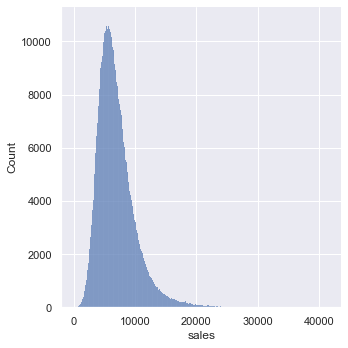

In [65]:
#plotar distribuição de vendas
sns.displot ( df4['sales'] )

A maioria dos algotirmos assumem premissas, como ter os dados distribuídos numa normal.
Quanto mais normal for a variável resposta, melhor o algoritmo vai performar.  

Há formas de tornar ela mais próximas de uma normal, como a log1p abaixo, que multiplica os valores de venda pelo log: (entenderei mais adiante)

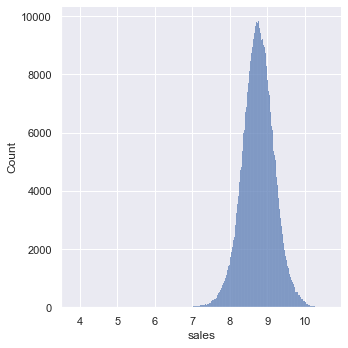

In [66]:
sns.displot (np.log1p ( df4['sales'] ) )

### Numerical Variable

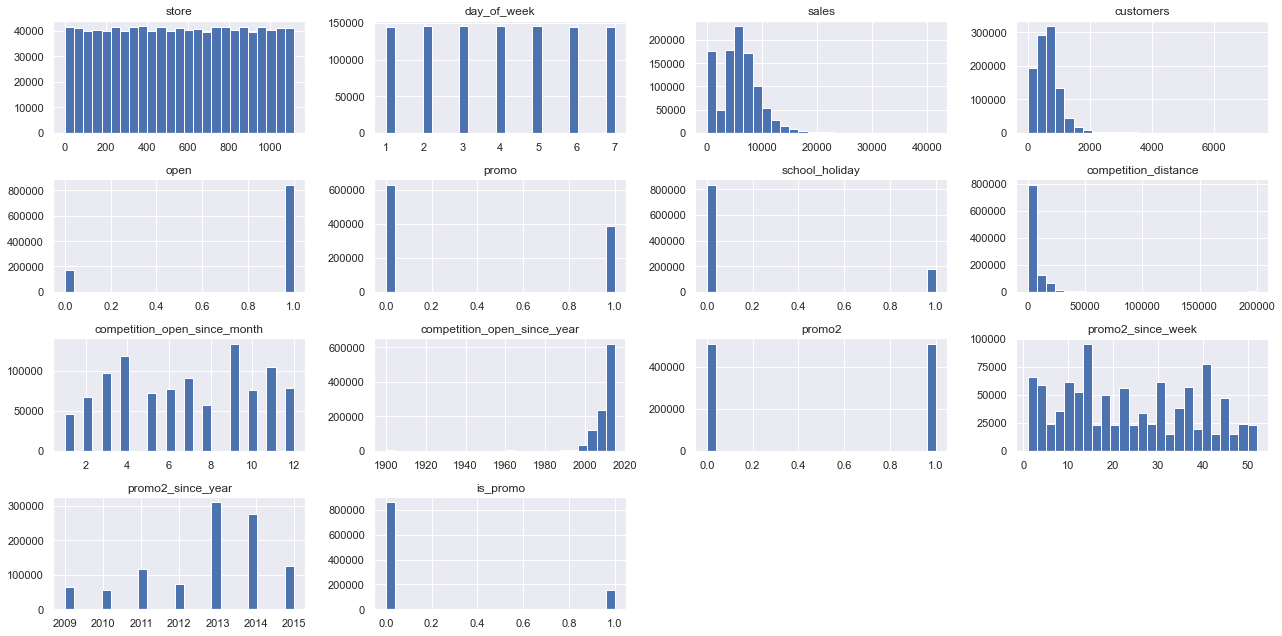

In [102]:
#Plotar histograma de todos os atributos numéricos  
#histograma é uma espécie de gráfico de barras que demonstra uma distribuição de frequências.

# bins é o número de barras, e ; é pra não mostrar texto
num_attributes.hist( bins = 25);
plt.tight_layout()

Se tem variação, nos ajuda a entender o fenômeno. 
days_of_week sozinha, se não for usada com outras variáveis, não tem relevância pro aprendizado do modelo.
sales e customers tem skew positiva: concentração de dados baixa (menor que a média)
promo: pra cada 3 lojas, 1 estava em promoção na data da venda.
promo2: só aprox. 50% das lojas estavam em promoção consecutiva (sequencia de uma anterios) quando venderam.
competition_distance: há uma enorme concentração de competidores próximos das lojas.


### Categorical Variable

In [71]:
#resumir:
cat_attributes.head()
#vamos avaliar as 3 primeiras, as duas últimas são só derivações

,state_holiday,store_type,assortment,promo_interval,month_map
0,0,c,a,0,Jul
1,0,a,a,"Jan,Apr,Jul,Oct",Jul
2,0,a,a,"Jan,Apr,Jul,Oct",Jul
3,0,c,c,0,Jul
4,0,a,a,0,Jul


#### state_holiday

In [72]:
df4['state_holiday'].value_counts()

regular_day       843428
public_holiday       694
easter_holiday       145
christmas             71
Name: state_holiday, dtype: int64

In [74]:
#pra voltar a ficar só com os tipos de dados originais
df4['state_holiday'].drop_duplicates()

0            regular_day
54837     public_holiday
107995    easter_holiday
199792         christmas
Name: state_holiday, dtype: object

/Users/home/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales', ylabel='Density'>

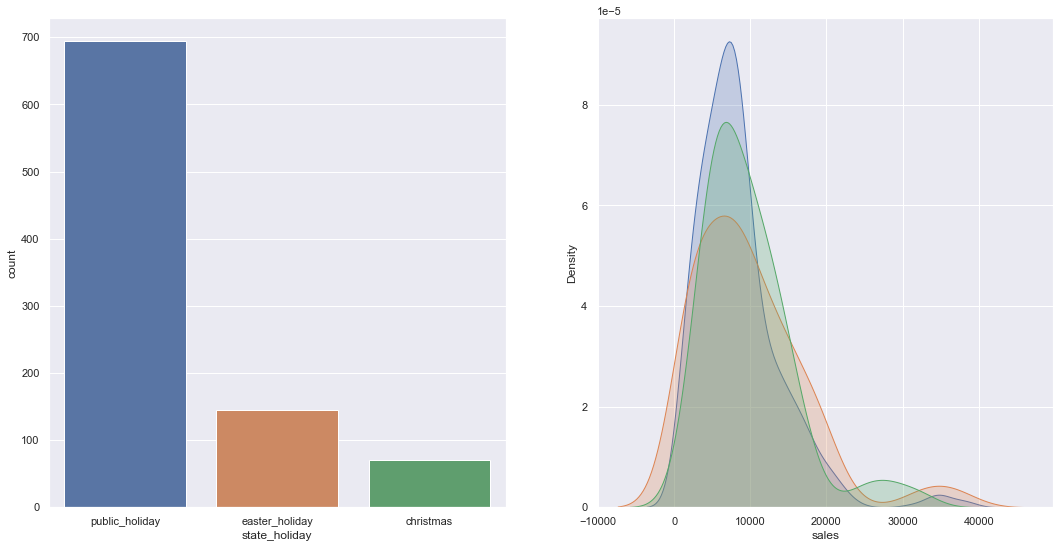

In [92]:
plt.subplot( 1,2,1)
#plotando apenas os feriados
a = df4.loc[df4['state_holiday'] != 'regular_day']
sns.countplot( a['state_holiday'] )

plt.subplot( 1,2,2)
#agora plotando os feriados sobrepostos
sns.kdeplot( df4[df4['state_holiday'] == 'public_holiday']['sales'], shade=True, label='public_holiday')
sns.kdeplot( df4[df4['state_holiday'] == 'easter_holiday']['sales'], shade=True, label='easter_holiday') 
sns.kdeplot( df4[df4['state_holiday'] == 'christmas']['sales'], shade=True, label='christmas') 

Interessante pro modelo saber o impacto que os feriados tem nas vendas, vamos usar a variável pra treinar o modelo.

#### store_type

In [95]:
df4['store_type'].value_counts()

a    457042
d    258768
c    112968
b     15560
Name: store_type, dtype: int64

In [96]:
#pra voltar a ficar só com os tipos de dados originais
df4['store_type'].drop_duplicates()

0     c
1     a
12    d
84    b
Name: store_type, dtype: object

/Users/home/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales', ylabel='Density'>

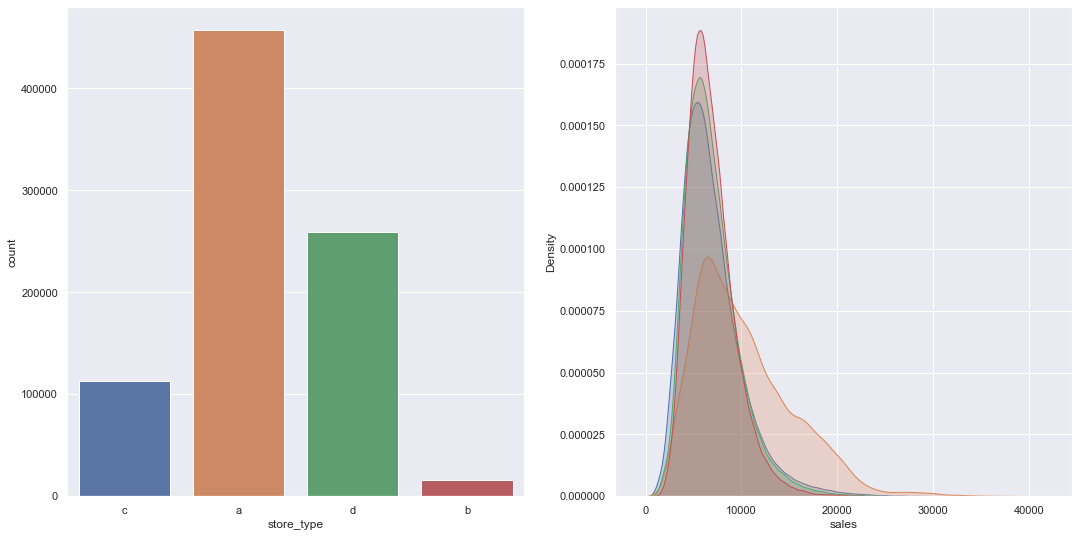

In [105]:
plt.subplot( 1,2,1)
#plotando os tipos das lojas
sns.countplot( df4['store_type'] )

plt.subplot( 1,2,2)
#agora plotando os feriados sobrepostos
sns.kdeplot( df4[df4['store_type'] == 'a']['sales'], shade=True, label='a')
sns.kdeplot( df4[df4['store_type'] == 'b']['sales'], shade=True, label='b') 
sns.kdeplot( df4[df4['store_type'] == 'c']['sales'], shade=True, label='c') 
sns.kdeplot( df4[df4['store_type'] == 'd']['sales'], shade=True, label='d')
#plt.tight_layout()

Interessante também pro modelo saber que o tipo de loja impacta assim na venda, vamos usar a variável pra treinar o modelo.

#### assortment

In [110]:
df4['assortment'].value_counts()

basic       444875
extended    391254
extra         8209
Name: assortment, dtype: int64

In [111]:
#pra voltar a ficar só com os tipos de dados originais
df4['assortment'].drop_duplicates()

0         basic
3      extended
258       extra
Name: assortment, dtype: object

/Users/home/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales', ylabel='Density'>

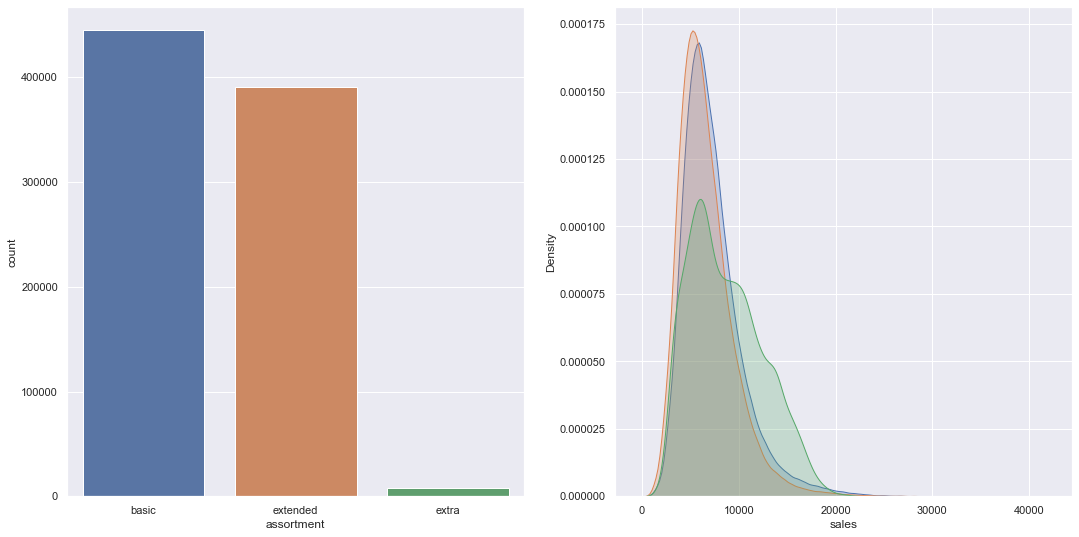

In [114]:
plt.subplot( 1,2,1)
#plotando os mixes das lojas
sns.countplot( df4['assortment'] )

plt.subplot( 1,2,2)
#agora plotando os feriados sobrepostos
sns.kdeplot( df4[df4['assortment'] == 'extended']['sales'], shade=True, label='extended')
sns.kdeplot( df4[df4['assortment'] == 'basic']['sales'], shade=True, label='basic') 
sns.kdeplot( df4[df4['assortment'] == 'extra']['sales'], shade=True, label='extra') 
#plt.tight_layout()

Interessante também pro modelo saber que o assorment de loja impacta na venda, vamos usar a variável pra treinar o modelo.

## Análise Bivariada

Vamos validar as 3 primieras hipóteses priorizadas

#### (H1 - loja) Lojas com maior sortimento deveriam vender mais.
***FALSA*** - Lojas com maior sortimento vendem menos.

<AxesSubplot:xlabel='assortment', ylabel='sales'>

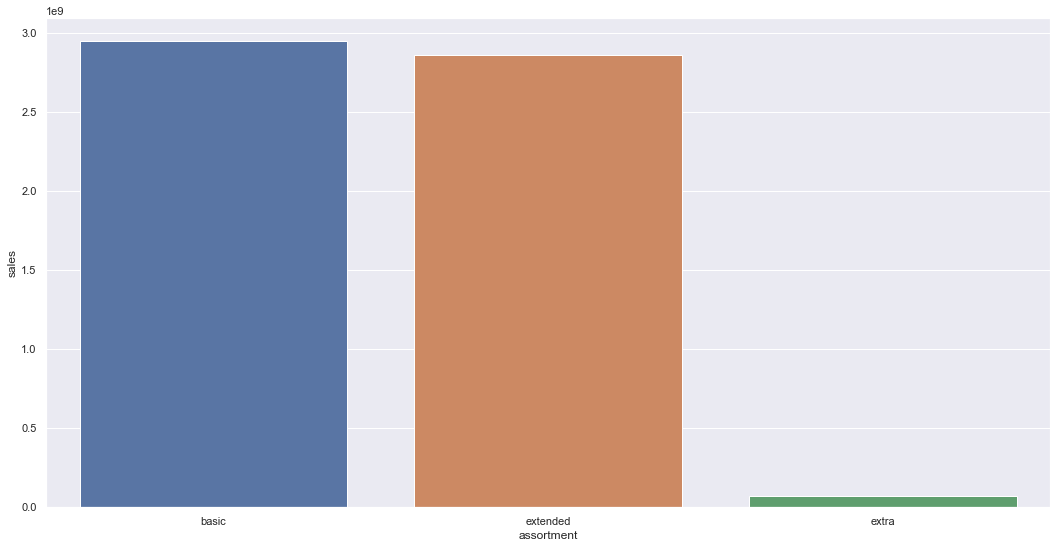

In [115]:
#Quantidade de vendas por loja:
aux1 = df4[['assortment','sales']].groupby( 'assortment' ).sum().reset_index()
sns.barplot ( x='assortment', y='sales', data=aux1 )

Assumimos que o assortment seja: basic < extended < extra, pois não tem essa legenda.
Baseados nisso, a hipótese é falsa, pois lojas com assortment extra vendem menos.


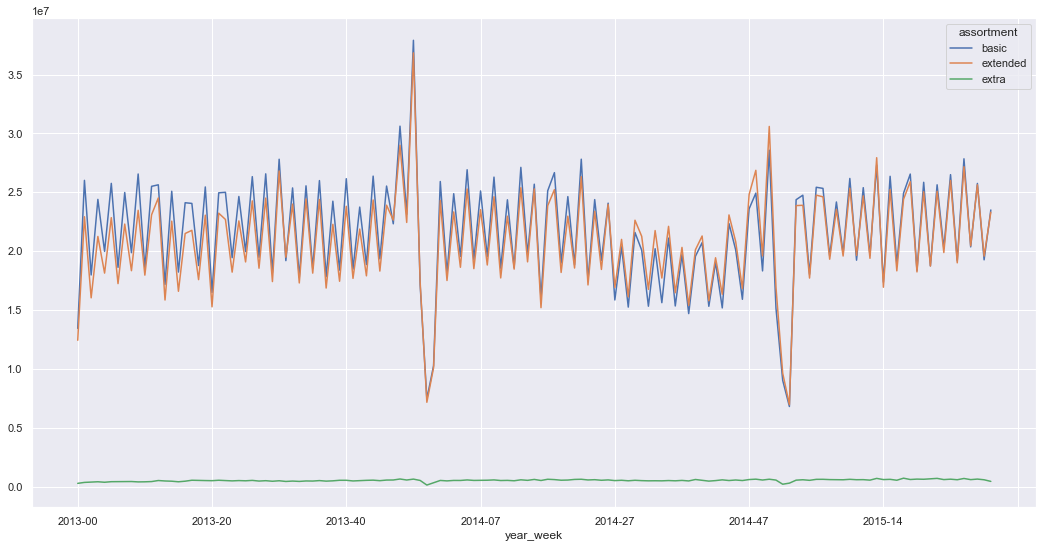

In [151]:
aux2 = df4[['year_week','assortment','sales']].groupby( ['year_week', 'assortment'] ).sum().reset_index()
aux2_piv = aux2.pivot ( index='year_week', columns='assortment', values='sales' ).plot()

Notamos que basic e extended tem praticamente o mesmo comportamento ao longo do tempo, já extra sempre teve bem menos vendas. 

Como extra tem muito menos vendas comparado com os demais, não dá pra ver a sua variação. Vamos olhar apenas ele agora:

In [150]:
#Obs: como é a estrutura de aux3 pra conseguir plotar: (tira o plot lá de cima pra rodar este)
aux2_piv

assortment,basic,extended,extra
year_week,,,
2013-00,13434262,12425669,269404
2013-01,26007250,22917693,350279
2013-02,17970974,16029584,377207
2013-03,24392076,21243431,404662
2013-04,19972891,18130077,363061
...,...,...,...
2015-26,27840342,27165959,684180
2015-27,20356210,20449036,586036
2015-28,25746704,25629698,632017


<AxesSubplot:xlabel='year_week'>

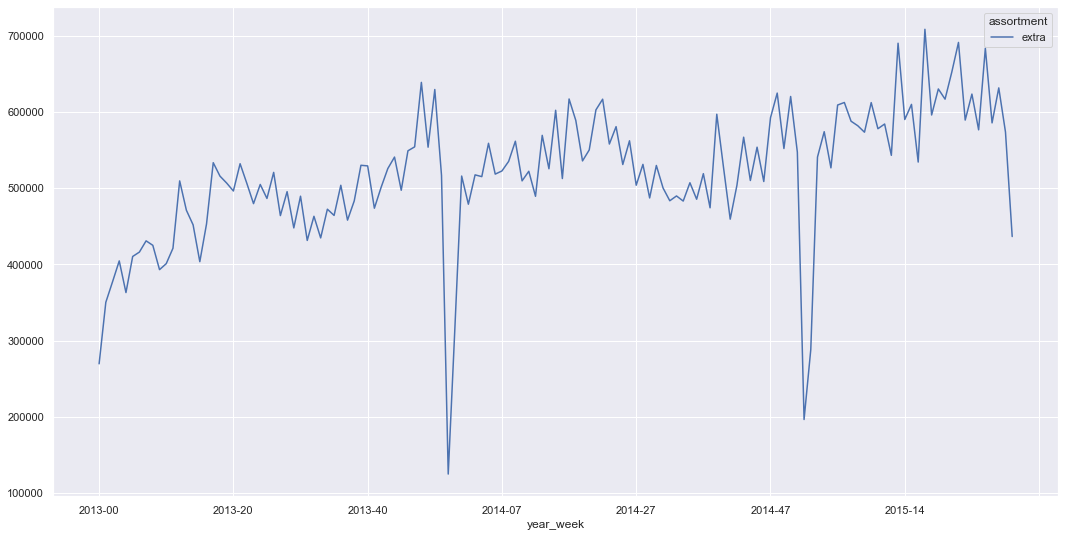

In [153]:
aux3 = aux2.loc[aux2['assortment'] == 'extra' ]
aux3.pivot ( index='year_week', columns='assortment', values='sales' ).plot()

Há variação também, mas diferente da oscilação dos demais assortments. Então é relevante pro modelo.

#### (H2 - loja) Lojas com competidores mais próximos deveriam vender menos.
***FALSA*** - Lojas com maior competidores mais próximos vendem mais.


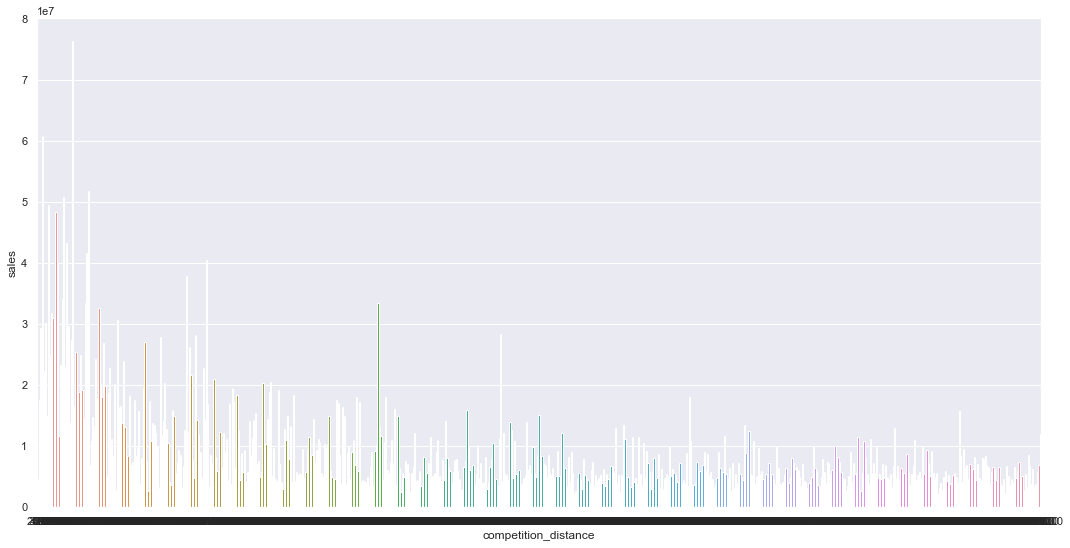

In [161]:
aux1 = df4[['competition_distance', 'sales']].groupby( 'competition_distance' ).sum().reset_index()
sns.barplot (x='competition_distance', y='sales', data=aux1);

Como ficou ilegível, vamos criar bins pra ficar mais fácil:

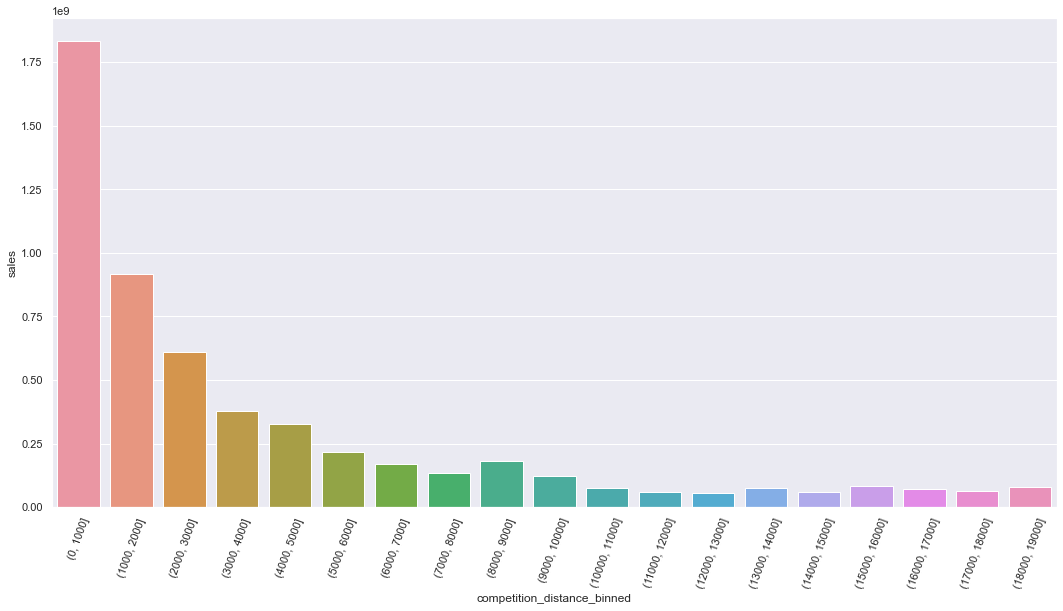

In [218]:
aux1 = df4[['competition_distance', 'sales']].groupby( 'competition_distance' ).sum().reset_index()
#bins são listas de 0 a 20k, dividido em grupos de 1k. Mesmo que fique fora vendas > 20k,
#já me mostra bem a concentração
bins = list(np.arange(0 ,20000, 1000) )

#coloca 'competition_distance' dentro dos bins:
aux1['competition_distance_binned'] = pd.cut ( aux1['competition_distance'], bins=bins )
aux2 = aux1[['competition_distance_binned', 'sales']].groupby( 'competition_distance_binned' ).sum().reset_index()

sns.barplot (x='competition_distance_binned', y='sales', data=aux2);
plt.xticks(rotation=70);

Obs: Na legenda: () não inclui o intervalo, e [] inclui o intervalo. Ex: (0, 1500] é do 1 ao 1500.

Temos aqui um baita insight: quanto menor a distância dos competidores, maior a quantidade de vendas, contrário à crença que parecia mais 'lógica'. 

In [219]:
#Obs: Como fica o aux1:
aux1.sample(5)

,competition_distance,sales,competition_distance_binned
314,4260.0,6030778,"(4000, 5000]"
429,7840.0,4008491,"(7000, 8000]"
21,230.0,13895113,"(0, 1000]"
160,1840.0,2908282,"(1000, 2000]"
561,16680.0,6783229,"(16000, 17000]"


Agrupamos a distribuição em barras, mas para ver melhor a distribuição podemos usar um  scatterplot:

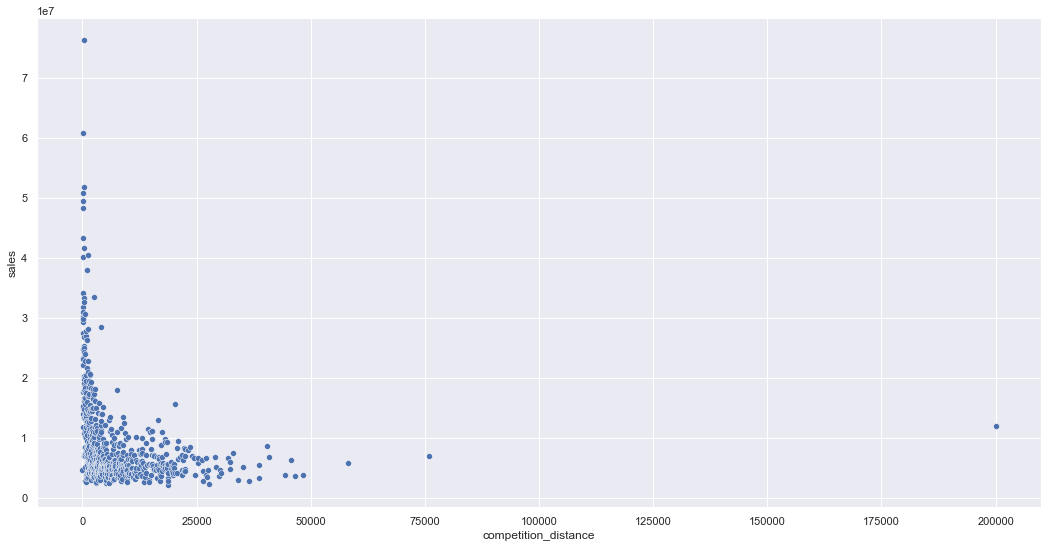

In [223]:
aux1 = df4[['competition_distance', 'sales']].groupby( 'competition_distance' ).sum().reset_index()
sns.scatterplot (x='competition_distance', y='sales', data=aux1);

Cada ponto representa uma das 655 distâncias únicas! 

Agora, vamos ver a força da correlação entre 'competition_distance', 'sales', pra entender melhor a força do impacto desta variável na variável resposta.

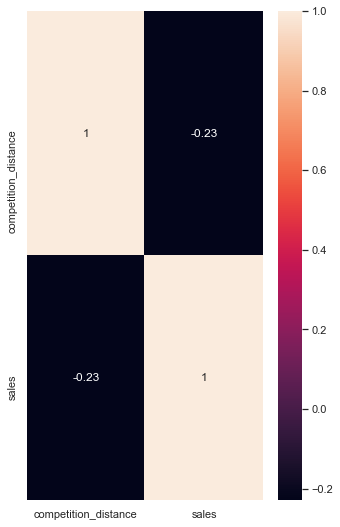

In [225]:
#força da correlação
plt.subplot( 1, 3, 3 )
sns.heatmap( aux1.corr (method='pearson'),annot=True );

Há correlação, mas é fraca: conforme aumenta a distância, diminuem as vendas.
Como a correlação é fraca, assumo que o fenômeno (venda) aumenta ou diminui muito mais por interferêncai de outros agentes (fluxo de clientes por ex) do que pela distância da concorrência isolada.

#### (H3 - loja) Lojas com competidores há mais tempo deveriam vender mais.
***FALSA*** - Lojas com COMPETIDORES HÁ MAIS TEMPO vendem MENOS

In [231]:
# vamos usar o 'competition_time_month' que criamos, pra ver há quantos meses existe competição
df4[['competition_time_month','sales']]

,competition_time_month,sales
0,84,5263
1,94,6064
2,105,8314
3,71,13995
4,4,4822
...,...,...
844333,77,3375
844334,161,10765
844335,0,5035
844336,0,4491


<AxesSubplot:xlabel='competition_time_month', ylabel='sales'>

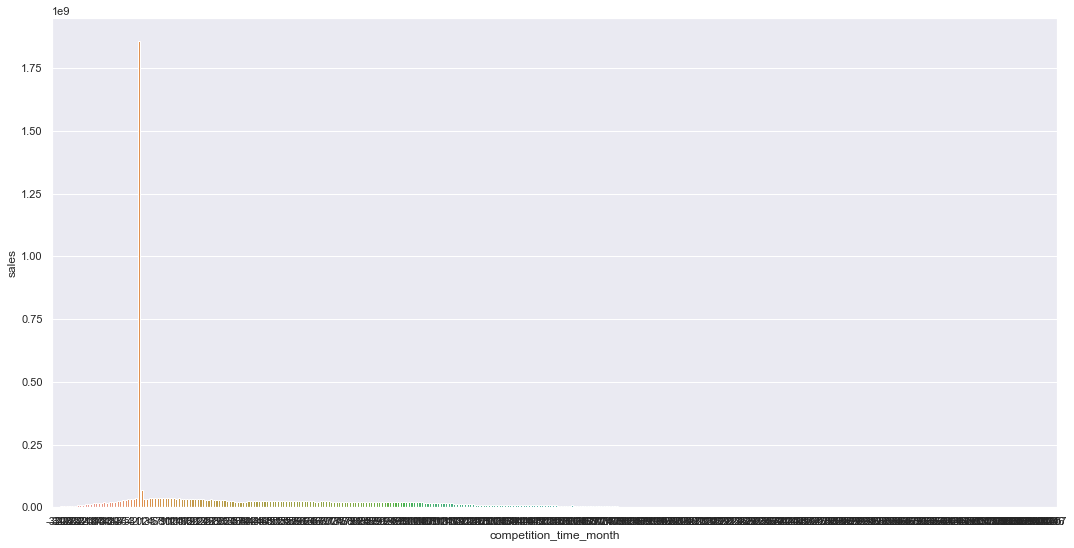

In [230]:
aux1 = df4[['competition_time_month','sales']].groupby( 'competition_time_month' ).sum().reset_index()
sns.barplot ( x='competition_time_month', y= 'sales', data=aux1 )

Ficou muito ruim de ver por este pico imenso. Vamos criar um filtro:

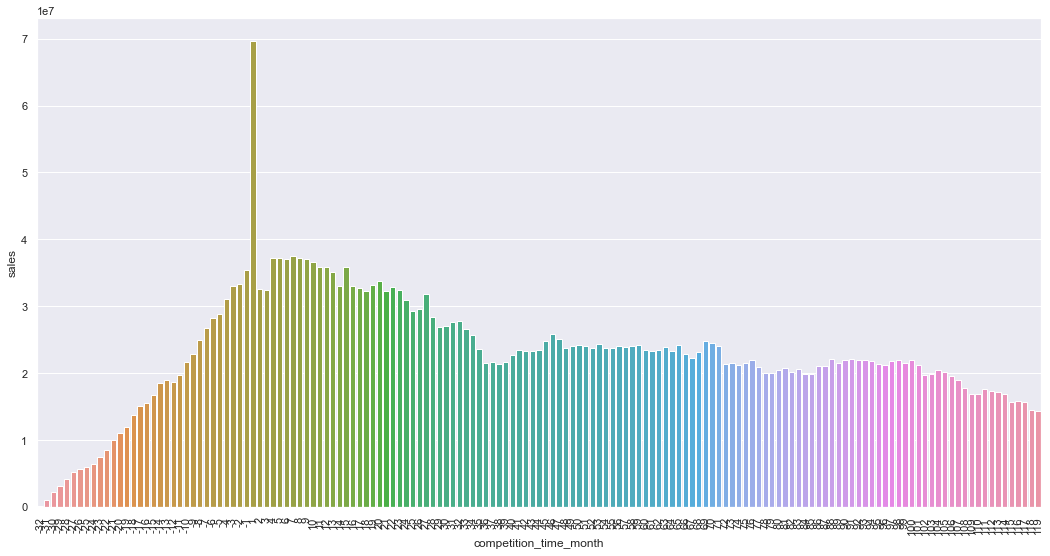

In [237]:
aux1 = df4[['competition_time_month','sales']].groupby( 'competition_time_month' ).sum().reset_index()
#filtrar só competição abaixo de 120 meses (10 anos) 
  #e que abriram em mês diferente do mesmo da venda (setamos esses no braço lá atrás):
aux2 = aux1[ ( aux1['competition_time_month'] < 120 ) & ( aux1['competition_time_month'] != 0 ) ]
sns.barplot ( x='competition_time_month', y= 'sales', data=aux2 )
plt.xticks(rotation=90);

Se valores positivo, competidor abriu há aquela quandiade de meses atrás dessa venda.
Se valor negativo, competidor vai abrir há aquela quandiade de meses pra frente desta venda. 

Insight bem contraditório ao senso comum:
Quanto mais recente é a competição (mais se aproxima o negativo de zero), maior é a venda!

Vamos agora criar um regplot de tendência de crescimento ou não: (só pra mostrar, mas não é boa nesse caso porque temos uma subida e uma descida nas vendas, então fica enviezado)

<AxesSubplot:xlabel='competition_time_month', ylabel='sales'>

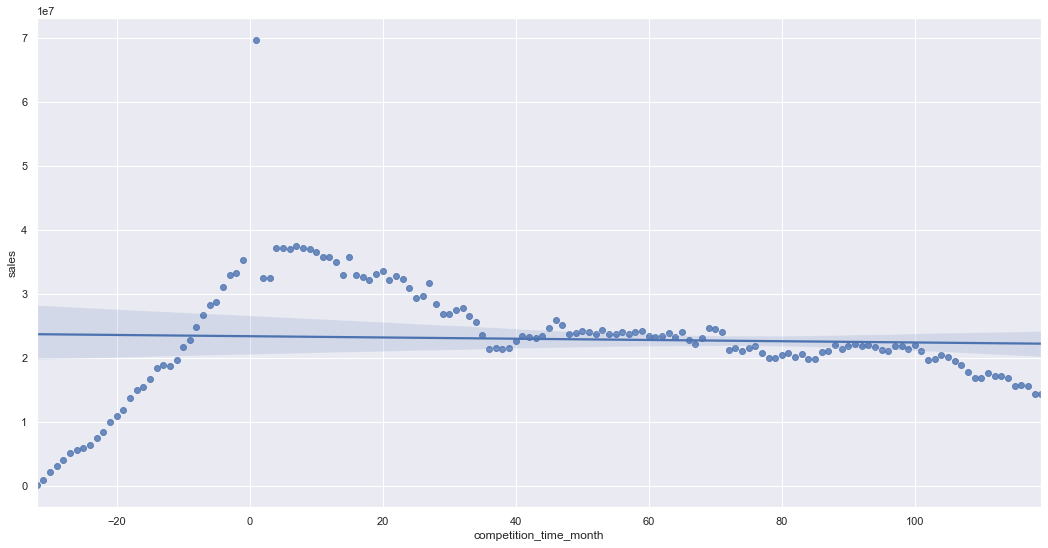

In [239]:
sns.regplot ( x='competition_time_month', y= 'sales', data=aux2 )

Vamos avaliar agora a correlação entre as variáveis:

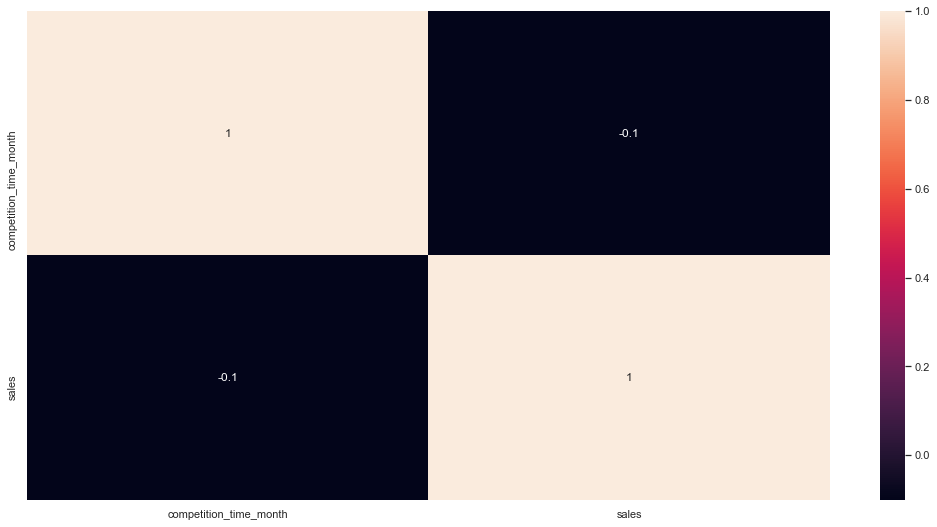

In [241]:
#força da correlação
sns.heatmap( aux1.corr (method='pearson'),annot=True );

Correlação baixa, mas ainda relevante.

## Análise Multivariada